# Lineplot

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

Grab parking data from UCI resource with Bash commands and read in as pandas DataFrame.

In [2]:
df = pd.read_csv("dataset/dataset.csv", parse_dates=[3])

df.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48


Do a bit of data cleaning:

- Rename some columns
- Create three new date/time columns for later aggregations
- Filter down to only two garage locations

In [3]:
df.rename(columns={'SystemCodeNumber': 'Location', 'LastUpdated': 'Timestamp'}, inplace=True)
df['Day'] = df.Timestamp.dt.date
df['Month'] = df.Timestamp.dt.month
df['Hour'] = df.Timestamp.dt.hour

In [4]:
park = df[df.Location.isin(['Broad Street', 'NIA South'])]

park.head()

,Location,Capacity,Occupancy,Timestamp,Day,Month,Hour
20171,Broad Street,690,178,2016-10-04 07:59:42,2016-10-04,10,7
20172,Broad Street,690,269,2016-10-04 08:25:42,2016-10-04,10,8
20173,Broad Street,690,415,2016-10-04 08:59:42,2016-10-04,10,8
20174,Broad Street,690,530,2016-10-04 09:32:46,2016-10-04,10,9
20175,Broad Street,690,600,2016-10-04 09:59:48,2016-10-04,10,9


## Basics

In [5]:
sns.set_style("dark")

In [6]:
months = [pd.datetime(2016, 10, 1), 
          pd.datetime(2016, 11, 1), 
          pd.datetime(2016, 12, 1)]
plt.rc('date.autoformatter', day='%b %Y');

<ipython-input-6-9fbd4ac3430f>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  months = [pd.datetime(2016, 10, 1),
<ipython-input-6-9fbd4ac3430f>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime(2016, 11, 1),
<ipython-input-6-9fbd4ac3430f>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime(2016, 12, 1)]


<AxesSubplot:xlabel='Day', ylabel='Occupancy'>

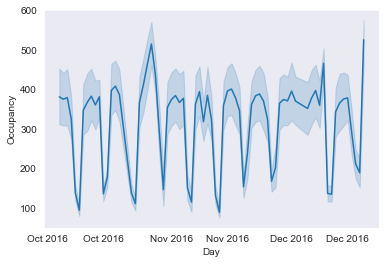

In [7]:
sns.lineplot(data=park, x="Day", y="Occupancy")

<AxesSubplot:xlabel='Hour', ylabel='Occupancy'>

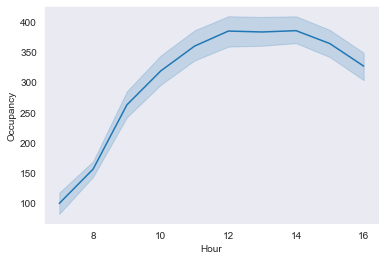

In [8]:
sns.lineplot(data=park, x="Hour", y="Occupancy")

## Bootstrapping

<AxesSubplot:xlabel='Hour', ylabel='Occupancy'>

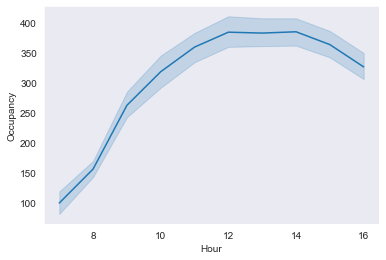

In [9]:
sns.lineplot(data=park, x="Hour", y="Occupancy", n_boot=1000)

Decreasing the number of bootstrap samples will increase variance of confidence intervals.

<AxesSubplot:xlabel='Hour', ylabel='Occupancy'>

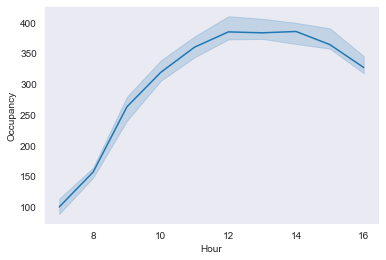

In [10]:
sns.lineplot(data=park, x="Hour", y="Occupancy", n_boot=10)

<AxesSubplot:xlabel='Hour', ylabel='Occupancy'>

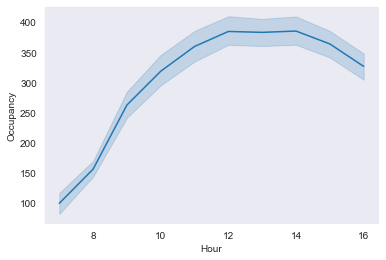

In [11]:
sns.lineplot(data=park, x="Hour", y="Occupancy", ci=95)

<AxesSubplot:xlabel='Hour', ylabel='Occupancy'>

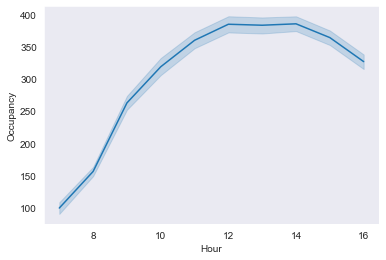

In [12]:
sns.lineplot(data=park, x="Hour", y="Occupancy", ci=68)

To turn off the bootstrapped confidence intervals, set ``ci=None`` to trigger early exit within Seaborn code. (A conditional checks for this case and completely bypasses the bootstrapping procedure if ``ci`` is set to ``None``. This saves time if confidence intervals are not needed!)

<AxesSubplot:xlabel='Hour', ylabel='Occupancy'>

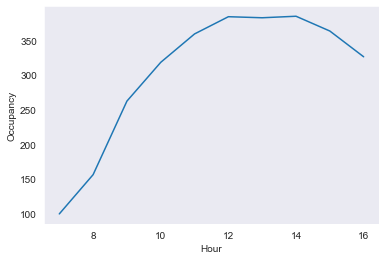

In [13]:
sns.lineplot(data=park, x="Hour", y="Occupancy", ci=None)

<AxesSubplot:xlabel='Hour', ylabel='Occupancy'>

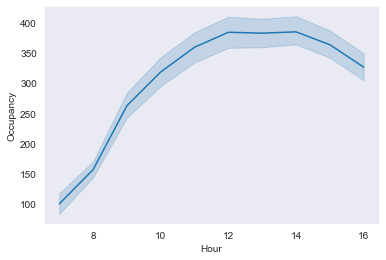

In [14]:
sns.lineplot(data=park, x="Hour", y="Occupancy", estimator="mean")

<AxesSubplot:xlabel='Hour', ylabel='Occupancy'>

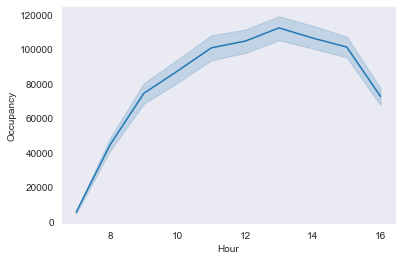

In [15]:
sns.lineplot(data=park, x="Hour", y="Occupancy", estimator="sum")

<AxesSubplot:xlabel='Hour', ylabel='Occupancy'>

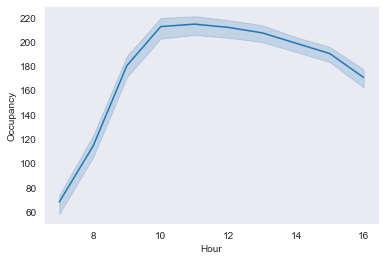

In [16]:
sns.lineplot(data=park, x="Hour", y="Occupancy", estimator="std")

## Visual Semantics

### hue

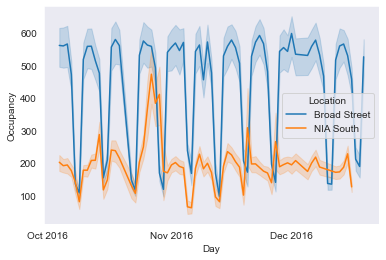

In [17]:
sns.lineplot(data=park, x="Day", y="Occupancy", hue="Location")
plt.xticks(months)
plt.show()

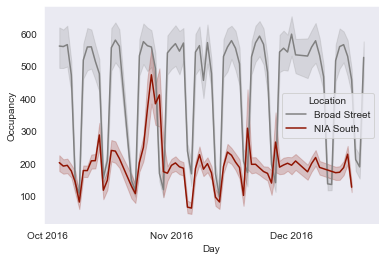

In [18]:
sns.lineplot(data=park, x="Day", y="Occupancy", hue="Location",
             palette=["gray", "xkcd:brick red"])
plt.xticks(months)
plt.show()

### Style

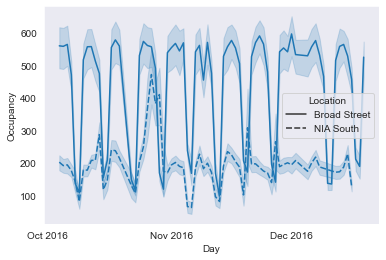

In [19]:
sns.lineplot(data=park, x="Day", y="Occupancy", style="Location")
plt.xticks(months)
plt.show()

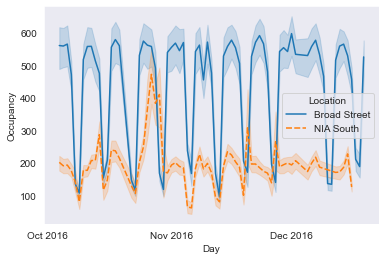

In [20]:
sns.lineplot(data=park, x="Day", y="Occupancy", 
             style="Location", hue="Location")
plt.xticks(months)
plt.show()

### size

<AxesSubplot:xlabel='Hour', ylabel='Occupancy'>

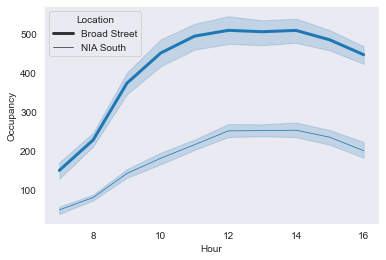

In [21]:
sns.lineplot(data=park, x="Hour", y="Occupancy", 
             size="Location")

<AxesSubplot:xlabel='Hour', ylabel='Occupancy'>

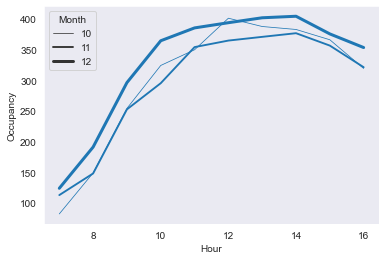

In [22]:
sns.lineplot(data=park, x="Hour", y="Occupancy", ci=None, size="Month")

### Style

Most of matplotlib's line styling works within the Seaborn lineplot. (The main exception is that ``linestyle`` does not work.)

<AxesSubplot:xlabel='Day', ylabel='Occupancy'>

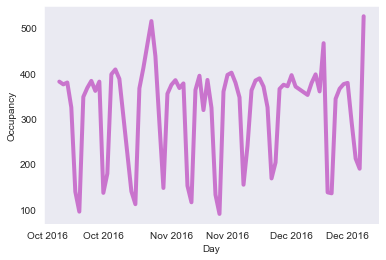

In [23]:
sns.lineplot(data=park, x="Day", y="Occupancy", 
             ci=None, lw=4, color="#aa00aa", alpha=0.5)